##Contexto do Desafio

Precisamos ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.


### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##Conhecendo o Dataset
###Estrutura dos Dados- O dataset inclui as seguintes informações:

Produto e Categoria: Itens vendidos e suas classificações.

Preço e Frete: Valores das vendas e custos associados.

Data de Compra e Local: Informações temporais e geográficas.

Avaliação da Compra: Feedback dos clientes.

Tipo de Pagamento e Parcelas: Métodos utilizados pelos clientes.

Coordenadas Geográficas: Localização das transações.

In [2]:
print(f"Loja 1: {len(loja)} linhas")
print(f"Loja 2: {len(loja2)} linhas")
print(f"Loja 3: {len(loja3)} linhas")
print(f"Loja 4: {len(loja4)} linhas")

Loja 1: 2359 linhas
Loja 2: 2359 linhas
Loja 3: 2359 linhas
Loja 4: 2358 linhas


In [3]:
print(loja.shape, loja2.shape, loja3.shape, loja4.shape)  # Confirma tamanho de cada tabela antes da união

(2359, 12) (2359, 12) (2359, 12) (2358, 12)


### Criação DataFrame Unificado

In [5]:
import pandas as pd

# Criando uma tabela única a partir das tabelas individuais
loja["Lojas"] = "Loja 1"
loja2["Lojas"] = "Loja 2"
loja3["Lojas"] = "Loja 3"
loja4["Lojas"] = "Loja 4"

df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print(df_unificado.head())  # Verifica se a coluna 'Lojas' está correta # Confirma se foi adicionada
pd.set_option('display.max_rows', None)



                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon   Lojas  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

In [6]:
print(df_unificado.shape) # Exibir as primeiras linhas para conferir

(9435, 13)


In [8]:
print(df_unificado.columns)  # Lista os nomes das colunas no dataframe consolidado

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Lojas'],
      dtype='object')


In [9]:
print(type(loja))  # Isso mostrará se `loja` é um DataFrame ou uma string

<class 'pandas.core.frame.DataFrame'>


#1. Análise do faturamento


###Faturamento total por loja
Mostra o total de receita gerada por cada loja.

In [10]:
faturamento_total_por_loja = df_unificado.groupby("Lojas")["Preço"].sum()
print("Faturamento Total por Loja:")
print(faturamento_total_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))


Faturamento Total por Loja:
Lojas
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


In [11]:
# Representação %faturamento loja 4 na rede

faturamento_loja4 = df_unificado[df_unificado["Lojas"] == "Loja 4"]["Preço"].sum()
faturamento_total = df_unificado["Preço"].sum()
percentual_faturamento_loja4 = (faturamento_loja4 / faturamento_total) * 100
print(f"O percentual de faturamento da Loja 4 é de: {percentual_faturamento_loja4:.2f}%")

O percentual de faturamento da Loja 4 é de: 23.58%


###Faturamento médio por loja

In [12]:
faturamento_medio_por_loja = df_unificado.groupby("Lojas")["Preço"].mean()
print("Faturamento Médio por Loja:")
print(faturamento_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))

Faturamento Médio por Loja:
Lojas
Loja 1    R$ 650,49
Loja 2    R$ 630,97
Loja 3    R$ 620,61
Loja 4    R$ 587,15
Name: Preço, dtype: object


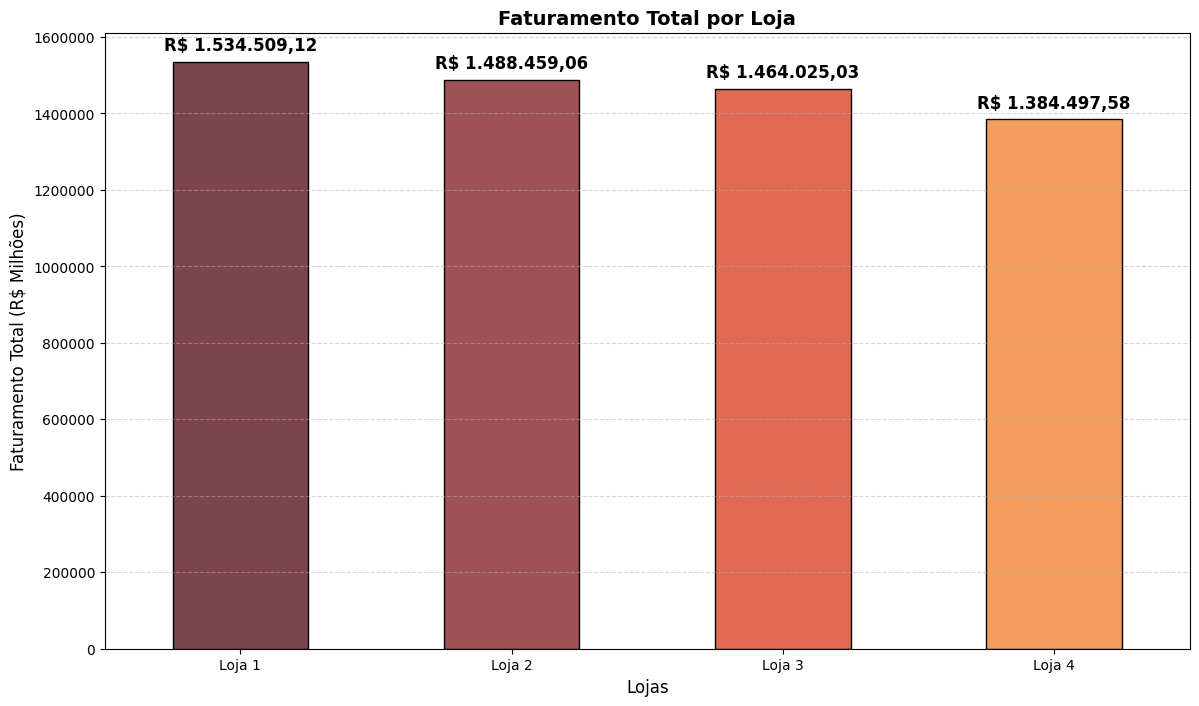

In [34]:
import matplotlib.pyplot as plt

# Configurando o tamanho do gráfico antes de plotar
fig, ax = plt.subplots(figsize=(14, 8))

# Cores personalizadas
cores = ["#7C444F", "#9F5255", "#E16A54", "#F39E60"]

# Criando gráfico de barras
faturamento_total_por_loja.plot(kind="bar", color=cores, edgecolor="black", ax=ax)

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_total_por_loja):
    ax.text(i, v + (v * 0.02), f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), ha="center", fontsize=12, fontweight="bold")

# Ajustes no layout do gráfico
plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento Total (R$ Milhões)", fontsize=12)
plt.ticklabel_format(style="plain", axis="y")  # Evita notação científica
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

####Por meio do grafico é possivel comparar a performance geral de cada loja,  mostra qual loja gerou mais receita no período. Isso é útil para entender qual unidade é mais lucrativa.



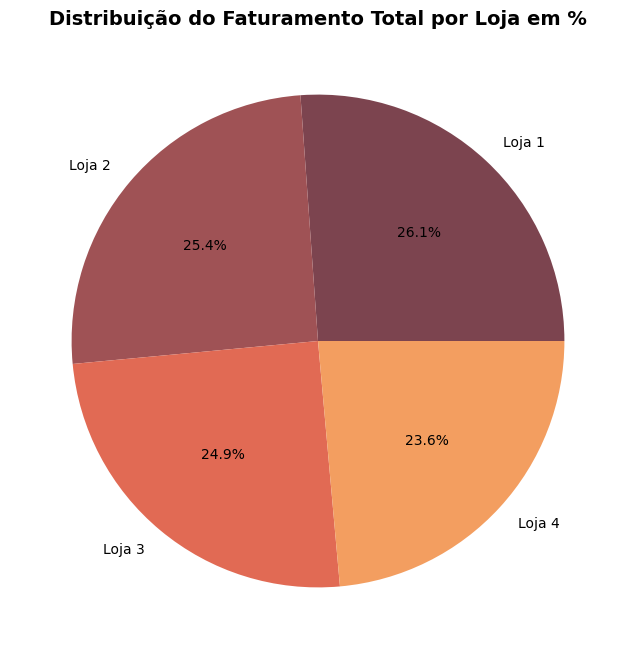

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(faturamento_total_por_loja, labels=faturamento_total_por_loja.index, autopct="%1.1f%%", colors=["#7C444F", "#9F5255", "#E16A54", "#F39E60"])

plt.title("Distribuição do Faturamento Total por Loja em %", fontsize=14, fontweight="bold")

plt.show()

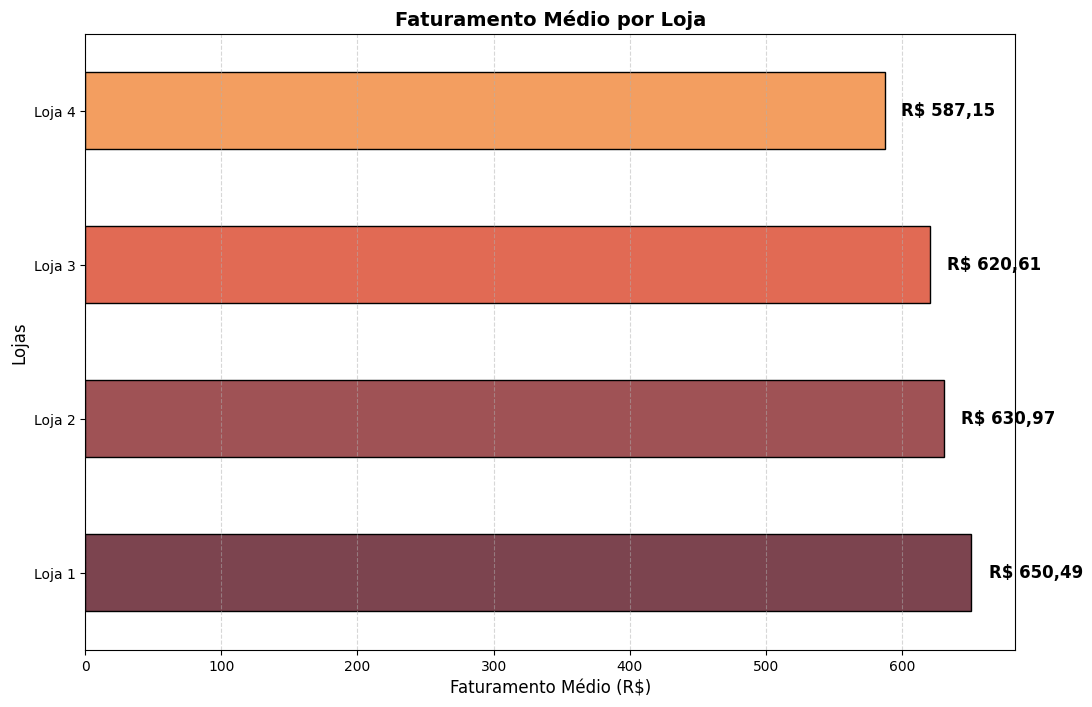

In [36]:
import matplotlib.pyplot as plt

# Criando o gráfico
faturamento_medio_por_loja = faturamento_medio_por_loja.astype(float)  # Garante que os valores são numéricos
ax = faturamento_medio_por_loja.plot(
    kind="barh",
    color=["#7C444F","#9F5255", "#E16A54","#F39E60"],
    figsize=(12, 8),
    edgecolor="black"
    )

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_medio_por_loja):
    ax.text(v + (v * 0.02), i, f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), va="center", fontsize=12, fontweight="bold")

plt.title("Faturamento Médio por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Médio (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()


####O faturamento médio por loja revela a média de receita gerada por cada loja, ajudando a identificar padrões de desempenho.



# 2. Vendas por Categoria


###Quantidade vendas para cada categoria dentro de cada loja

In [38]:
produtos_vendidos_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Produto"].count().reset_index()
produtos_vendidos_por_categoria.rename(columns={"Produto": "Quantidade_Vendas"}, inplace=True)
produtos_vendidos_por_categoria.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False], inplace=True)
print(produtos_vendidos_por_categoria)

categorias_mais_populares = produtos_vendidos_por_categoria.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])
print(categorias_mais_populares.groupby("Lojas").head(2))  # Mostra a categoria mais vendida por loja

     Lojas   Categoria do Produto  Quantidade_Vendas
6   Loja 1                 moveis                465
2   Loja 1            eletronicos                448
0   Loja 1             brinquedos                324
1   Loja 1       eletrodomesticos                312
3   Loja 1        esporte e lazer                284
4   Loja 1  instrumentos musicais                182
5   Loja 1                 livros                173
7   Loja 1  utilidades domesticas                171
14  Loja 2                 moveis                442
10  Loja 2            eletronicos                422
8   Loja 2             brinquedos                313
9   Loja 2       eletrodomesticos                305
11  Loja 2        esporte e lazer                275
12  Loja 2  instrumentos musicais                224
13  Loja 2                 livros                197
15  Loja 2  utilidades domesticas                181
22  Loja 3                 moveis                499
18  Loja 3            eletronicos             

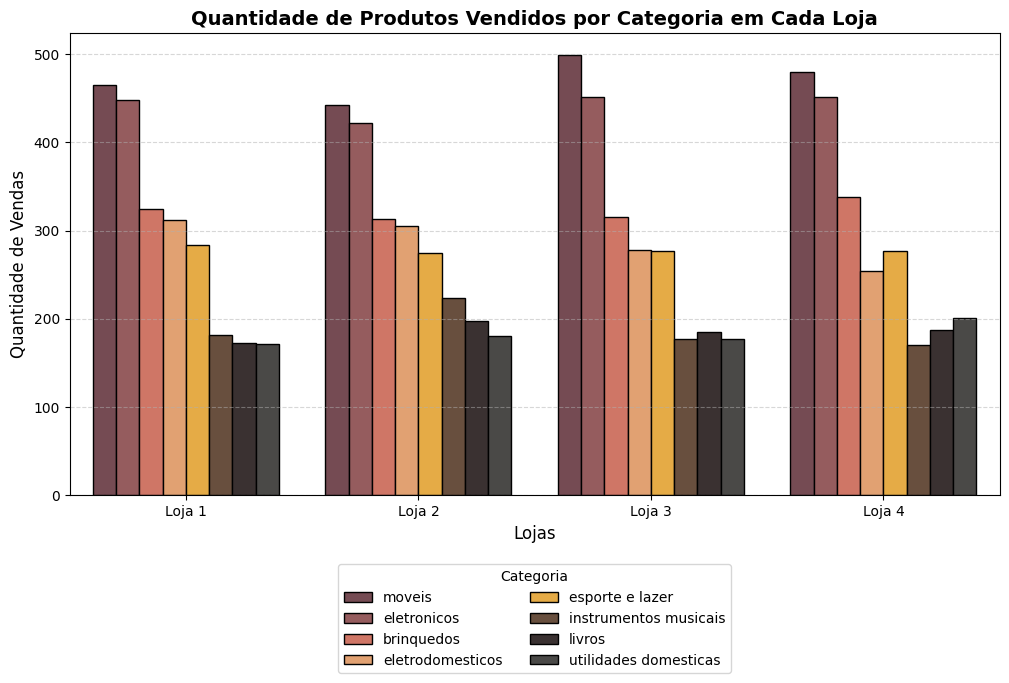

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=produtos_vendidos_por_categoria, x="Lojas", y="Quantidade_Vendas", hue="Categoria do Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C","#6F4E37","#3B3030","#4A4947"], edgecolor="black", width=0.8)

plt.title("Quantidade de Produtos Vendidos por Categoria em Cada Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Categoria", loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

#### Analisando ofaturamento das categorias "Móveis" e "Eletrônicos" por loja, e o percentual dessas categorias em relação ao faturamento total.


In [51]:
# Filtrando apenas as categorias "Móveis" e "Eletrônicos"
categorias_relevantes = ["moveis", "eletronicos"]
faturamento_categorias_relevantes_por_loja = df_unificado[df_unificado["Categoria do Produto"].isin(categorias_relevantes)].groupby("Lojas")["Preço"].sum()
print(faturamento_categorias_relevantes_por_loja)

# Calculando o percentual
percentual_faturamento = (faturamento_categorias_relevantes_por_loja / faturamento_total_por_loja) * 100


# Exibindo o resultado
print("Percentual de Faturamento das Categorias Móveis e Eletrônicos por Loja:")
print(percentual_faturamento.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))


Lojas
Loja 1    822837.34
Loja 2    783008.39
Loja 3    815795.48
Loja 4    802672.51
Name: Preço, dtype: float64
Percentual de Faturamento das Categorias Móveis e Eletrônicos por Loja:
Lojas
Loja 1    R$ 53,62
Loja 2    R$ 52,61
Loja 3    R$ 55,72
Loja 4    R$ 57,98
Name: Preço, dtype: object


# 3. Média de Avaliação das Lojas

In [48]:
media_avaliacoes_por_loja = df_unificado.groupby("Lojas")["Avaliação da compra"].mean().reset_index()
media_avaliacoes_por_loja.rename(columns={"Avaliação da compra": "Média_Avaliações"}, inplace=True)

print(media_avaliacoes_por_loja)

    Lojas  Média_Avaliações
0  Loja 1          3.976685
1  Loja 2          4.037304
2  Loja 3          4.048326
3  Loja 4          3.995759


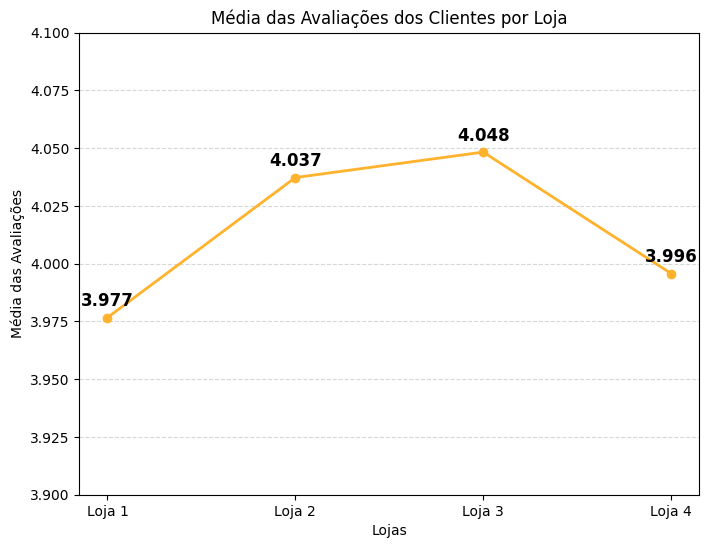

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Criando o gráfico de linhas
plt.plot(media_avaliacoes_por_loja["Lojas"], media_avaliacoes_por_loja["Média_Avaliações"], marker="o", linestyle="-", color="#FFB22C", linewidth=2)

plt.xlabel("Lojas")
plt.ylabel("Média das Avaliações")
plt.title("Média das Avaliações dos Clientes por Loja")
plt.ylim(3.9, 4.1)  # Ajusta escala para focar nas diferenças sutis
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir os valores nos pontos do gráfico
for i, v in enumerate(media_avaliacoes_por_loja["Média_Avaliações"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [21]:
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

mais_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(1)  # Produto mais vendido por loja
menos_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(1)  # Produto menos vendido por loja

print("Mais vendidos:")
print(mais_vendidos_por_loja)
print("\nMenos vendidos:")
print(menos_vendidos_por_loja)


Mais vendidos:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
79   Loja 2  Iniciando em programação                 65
134  Loja 3             Kit banquetas                 57
161  Loja 4                  Cama box                 62

Menos vendidos:
      Lojas            Produto  Quantidade_Vendas
26   Loja 1            Headset                 33
82   Loja 2  Jogo de tabuleiro                 32
105  Loja 3   Blocos de montar                 35
178  Loja 4           Guitarra                 33


In [59]:
# Agrupar e contar vendas de produtos por loja
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Ordenar por Loja e quantidade de vendas
produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True,False])

# Selecionar os 5 mais vendidos por loja
top_5_mais_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(5)

# Exibir os resultados
print("Top 5 produtos mais vendidos por loja:")
print(top_5_mais_vendidos)

Top 5 produtos mais vendidos por loja:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
37   Loja 1               Micro-ondas                 60
47   Loja 1             TV Led UHD 4K                 60
43   Loja 1        Secadora de roupas                 58
3    Loja 1          Blocos de montar                 56
79   Loja 2  Iniciando em programação                 65
88   Loja 2               Micro-ondas                 62
52   Loja 2                   Bateria                 61
91   Loja 2                  Pandeiro                 58
100  Loja 2                    Violão                 58
134  Loja 3             Kit banquetas                 57
111  Loja 3                 Cama king                 56
138  Loja 3            Mesa de jantar                 56
119  Loja 3                    Cômoda                 55
132  Loja 3           Jogo de panelas                 55
161  Loja 4                  Cama box            

In [60]:
# Selecionar os 5 menos vendidos por loja
top_5_menos_vendidos = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(5)

# Exibir os resultados
print("Top 5 produtos menos vendidos por loja:")
print(top_5_menos_vendidos)

Top 5 produtos menos vendidos por loja:
      Lojas             Produto  Quantidade_Vendas
38   Loja 1             Mochila                 39
40   Loja 1            Pandeiro                 36
41   Loja 1   Panela de pressão                 35
11   Loja 1        Celular ABXY                 33
26   Loja 1             Headset                 33
73   Loja 2      Fone de ouvido                 37
93   Loja 2            Poltrona                 35
78   Loja 2          Impressora                 34
87   Loja 2      Mesa de jantar                 34
82   Loja 2   Jogo de tabuleiro                 32
127  Loja 3            Guitarra                 38
131  Loja 3       Jogo de copos                 36
139  Loja 3         Micro-ondas                 36
140  Loja 3             Mochila                 36
105  Loja 3    Blocos de montar                 35
176  Loja 4           Geladeira                 38
187  Loja 4  Lavadora de roupas                 38
202  Loja 4              Violão           

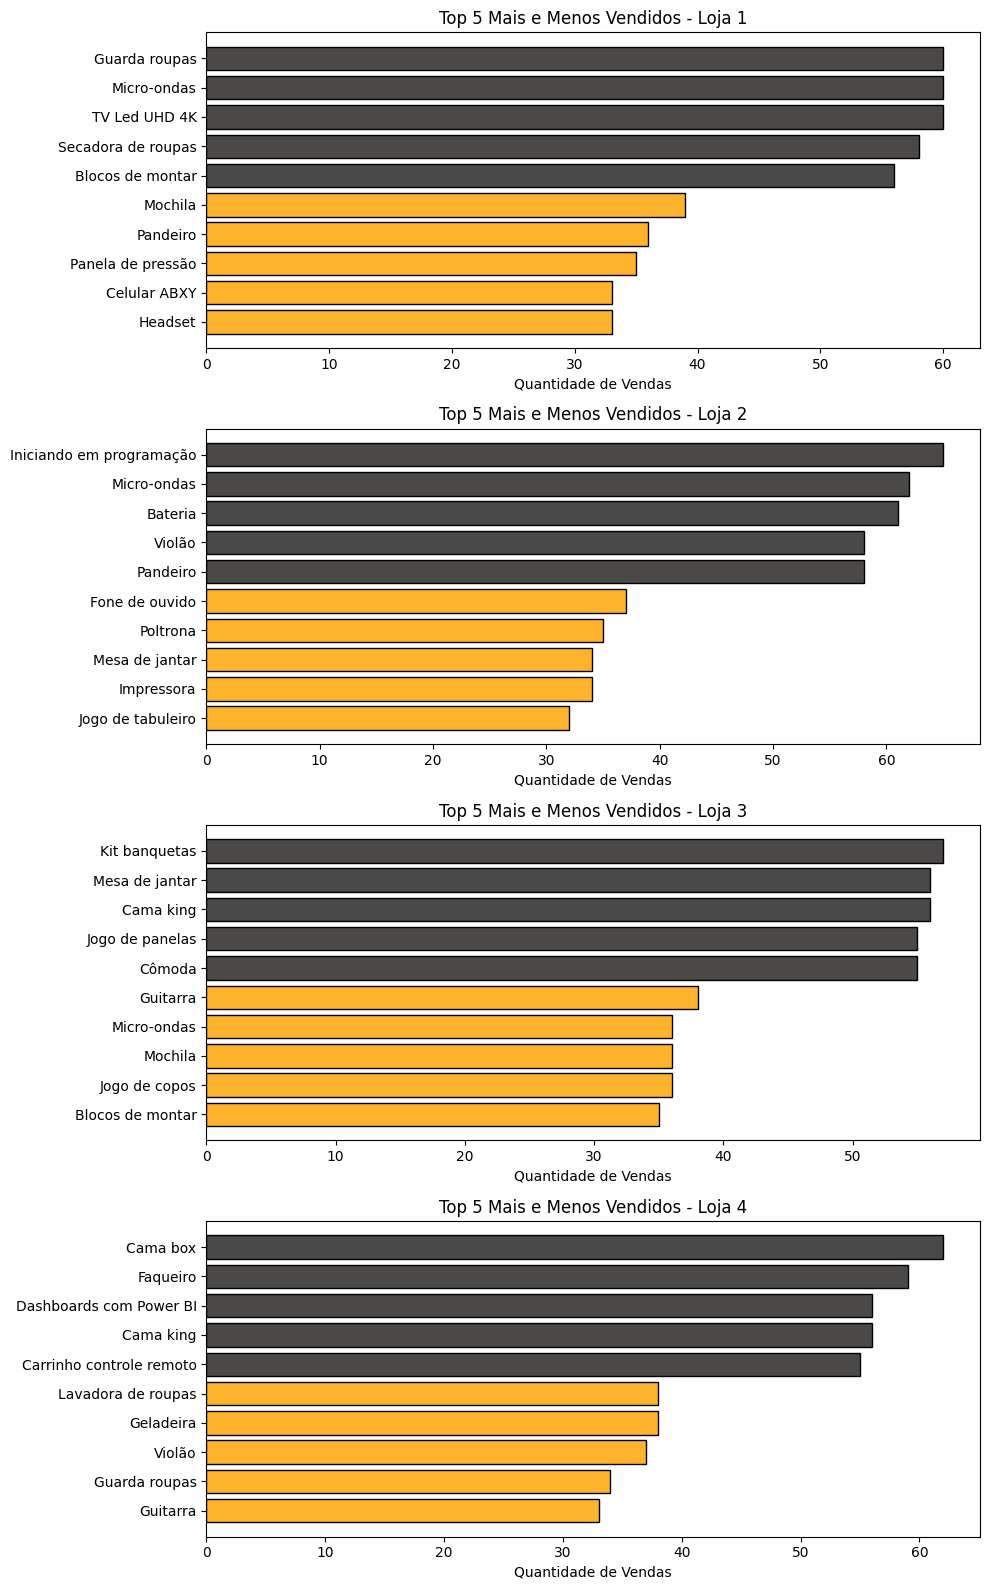

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar gráficos para cada loja
lojas = produtos_vendidos_por_loja_sorted["Lojas"].unique()
fig, axes = plt.subplots(len(lojas), 1, figsize=(10, len(lojas) * 4))

for i, loja in enumerate(lojas):
    dados_loja = produtos_vendidos_por_loja_sorted[produtos_vendidos_por_loja_sorted["Lojas"] == loja]

    # Ordenar corretamente em ordem decrescente
    dados_loja = dados_loja.sort_values("Quantidade_Vendas", ascending=False)

    # Pegando os 5 mais vendidos
    top_5_mais_vendidos = dados_loja.iloc[:5]

    # Pegando os 5 menos vendidos
    top_5_menos_vendidos = dados_loja.iloc[-5:]

    # Concatenando para exibir no gráfico
    dados_plot = pd.concat([top_5_mais_vendidos, top_5_menos_vendidos])

    # Invertendo a ordem para que os mais vendidos fiquem no topo
    dados_plot = dados_plot.sort_values("Quantidade_Vendas", ascending=True)

    # Criando gráfico de barras horizontais
    axes[i].barh(dados_plot["Produto"], dados_plot["Quantidade_Vendas"],
                 color=["#FFB22C"] * 5 + ["#4A4947"] * 5, edgecolor="black")
    axes[i].set_title(f"Top 5 Mais e Menos Vendidos - {loja}")
    axes[i].set_xlabel("Quantidade de Vendas")

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


Pelos valores apresentados, os custos médios de frete por loja são relativamente próximos, sem grandes discrepâncias. A diferença entre a loja com maior custo de 34,69 e a loja com menor custo de 31,27é de aproximadamente R$3,41, o que indica uma variação pequena e consistente.



In [25]:
custo_medio_frete_por_loja = df_unificado.groupby("Lojas")["Frete"].mean().reset_index()
custo_medio_frete_por_loja.rename(columns={f"Frete": "Custo_Médio_Frete:"}, inplace=True)
custo_medio_frete_por_loja["Custo_Médio_Frete:"] = custo_medio_frete_por_loja["Custo_Médio_Frete:"].apply(lambda x: f"R$ {x:,.2f}")

print(custo_medio_frete_por_loja)


    Lojas Custo_Médio_Frete:
0  Loja 1           R$ 34.69
1  Loja 2           R$ 33.62
2  Loja 3           R$ 33.07
3  Loja 4           R$ 31.28


In [26]:
import pandas as pd

# Criar tabela formatada com pandas
from IPython.display import display

display(custo_medio_frete_por_loja.style.set_caption("Custo Médio de Frete por Loja")
                                      .set_properties(**{'text-align': 'center'})
                                      .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))


from tabulate import tabulate

print(tabulate(custo_medio_frete_por_loja, headers="keys", tablefmt="pipe"))

,Lojas,Custo_Médio_Frete:
0,Loja 1,R$ 34.69
1,Loja 2,R$ 33.62
2,Loja 3,R$ 33.07
3,Loja 4,R$ 31.28


|    | Lojas   | Custo_Médio_Frete:   |
|---:|:--------|:---------------------|
|  0 | Loja 1  | R$ 34.69             |
|  1 | Loja 2  | R$ 33.62             |
|  2 | Loja 3  | R$ 33.07             |
|  3 | Loja 4  | R$ 31.28             |


####Calculo % frete em relação ao faturamento total

In [27]:
# Dados de custo médio de frete por loja
custo_medio_frete_por_loja = {
    "Loja 1": 34.69,
    "Loja 2": 33.62,
    "Loja 3": 33.07,
    "Loja 4": 31.28
}

# Supondo que faturamento_total_por_loja já tenha sido calculado anteriormente
percentual_frete = {loja: (custo_medio_frete_por_loja[loja] / faturamento_total_por_loja.loc[loja]) * 100 for loja in faturamento_total_por_loja.index}

# Formatando os valores para exibição
percentual_frete_formatado = {loja: f"{valor:}%" for loja, valor in percentual_frete.items()}

# Exibindo os resultados
print("Percentual do Custo de Frete em relação ao Faturamento Total por Loja:")
print(percentual_frete_formatado)

Percentual do Custo de Frete em relação ao Faturamento Total por Loja:
{'Loja 1': '0.0022606577926366444%', 'Loja 2': '0.002258711771353657%', 'Loja 3': '0.002258841162025761%', 'Loja 4': '0.0022593033351492025%'}


In [28]:
print(custo_medio_frete_por_loja.keys())
print(faturamento_total_por_loja.keys())

dict_keys(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])
Index(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], dtype='object', name='Lojas')


## Análises Extras
####Usando as coordenadas geográficas para mapear as vendas e explorar padrões que possam influenciar o desempenho das lojas.

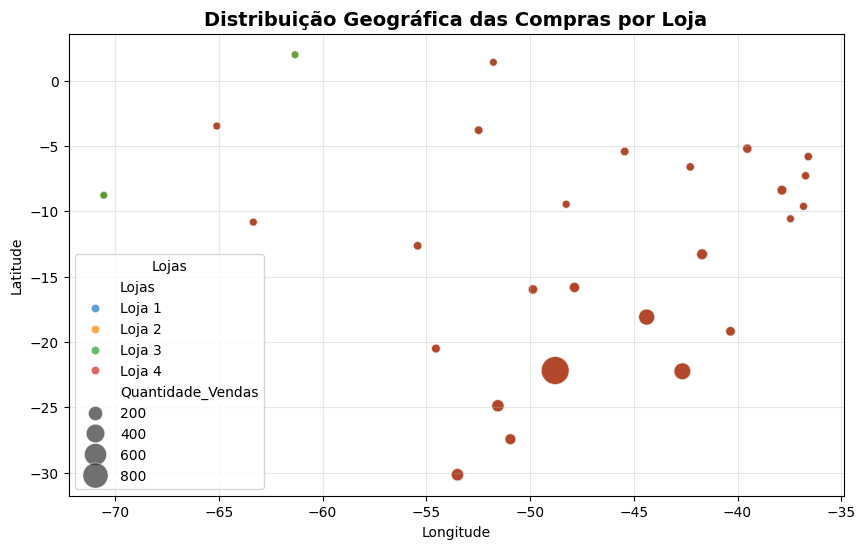

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por loja e localização
compras_por_regiao = df_unificado.groupby(["lon", "lat", "Lojas"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar um mapa de calor para visualizar vendas por região
plt.figure(figsize=(10, 6))
sns.scatterplot(data=compras_por_regiao, x="lon", y="lat", hue="Lojas", size="Quantidade_Vendas", sizes=(30, 400), palette="tab10", alpha=0.7)

plt.title("Distribuição Geográfica das Compras por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Lojas")
plt.grid(alpha=0.3)

plt.show()

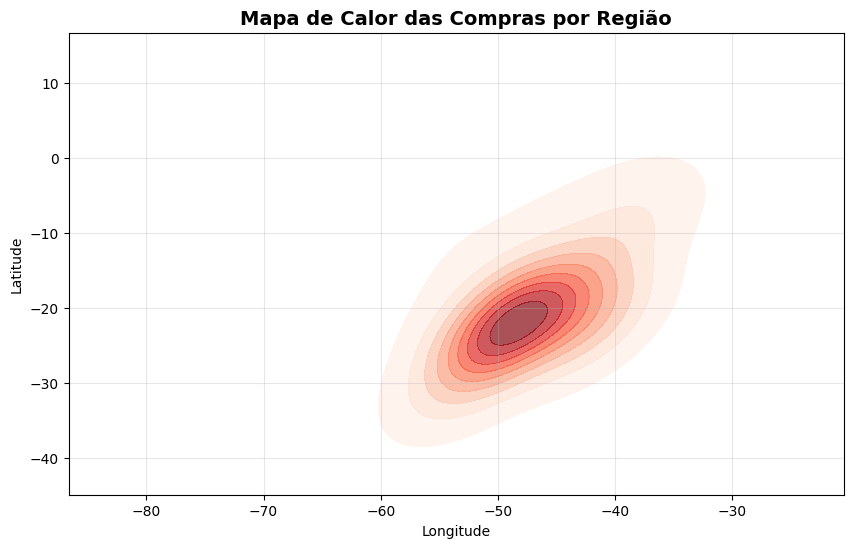

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar e contar compras por coordenadas geográficas
compras_por_local = df_unificado.groupby(["lon", "lat"])["Produto"].count().reset_index(name="Quantidade_Vendas")

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(data=compras_por_local, x="lon", y="lat", weights="Quantidade_Vendas", cmap="Reds", fill=True, alpha=0.7)

plt.title("Mapa de Calor das Compras por Região", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)

plt.show()

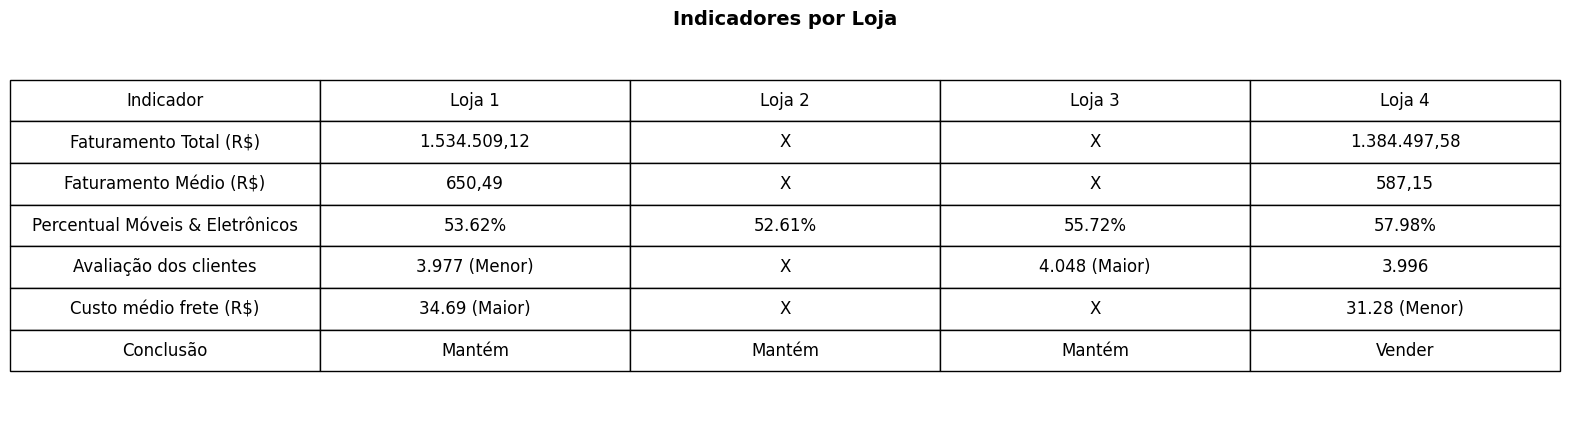

In [69]:
import matplotlib.pyplot as plt

# Definindo os dados da tabela
dados = [
    ["Faturamento Total (R$)", "1.534.509,12", "X", "X", "1.384.497,58"],
    ["Faturamento Médio (R$)", "650,49", "X", "X", "587,15"],
    ["Percentual Móveis & Eletrônicos", "53.62%", "52.61%", "55.72%", "57.98%"],
    ["Avaliação dos clientes", "3.977 (Menor)", "X", "4.048 (Maior)", "3.996"],
    ["Custo médio frete (R$)", "34.69 (Maior)", "X", "X", "31.28 (Menor)"],
    ["Conclusão", "Mantém", "Mantém", "Mantém", "Vender"]
]

# Criando figura e eixo vazio
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_axis_off()  # Remove os eixos para exibir apenas a tabela

# Criando tabela
tabela = ax.table(cellText=dados,
                  colLabels=["Indicador", "Loja 1", "Loja 2", "Loja 3", "Loja 4"],
                  cellLoc="center",
                  loc="center")

# Ajustando estilo
tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
tabela.scale(2.5, 2.5)  # Ajusta tamanho da tabela

# Exibir gráfico com tabela
plt.title("Indicadores por Loja", fontsize=14, fontweight="bold")
plt.show()

#Relatório Final: ✅


##📖 1. O Desafio do Sr. João
#### Após anos no mercado, o Sr. João percebeu que era hora de inovar. Ele deseja iniciar um novo empreendimento, mas para isso precisa vender uma de suas lojas. A decisão não pode ser feita no impulso—ela deve ser fundamentada em dados. Qual das quatro unidades da Alura Store apresenta menor eficiência? Essa é a questão que guia esta análise.

###✔ Objetivo do relatório:
#### Este relatório tem como objetivo recomendar ao nosso cliente, Sr. João, qual loja da sua rede Alura Store vender para iniciar um novo empreendimento. A análise descritiva dos dados ajudará a fornecer uma leitura clara e fundamentada do atual cenário do negócio, auxiliando na tomada de decisão.

###✔ Metodologia usada para análise

#### Os dados utilizados neste relatório foram extraídos do sistema de vendas da Alura Store. Foi realizado um filtro por loja que resultou em 4 arquivos CSVs, contendo as seguintes colunas em cada arquivo:
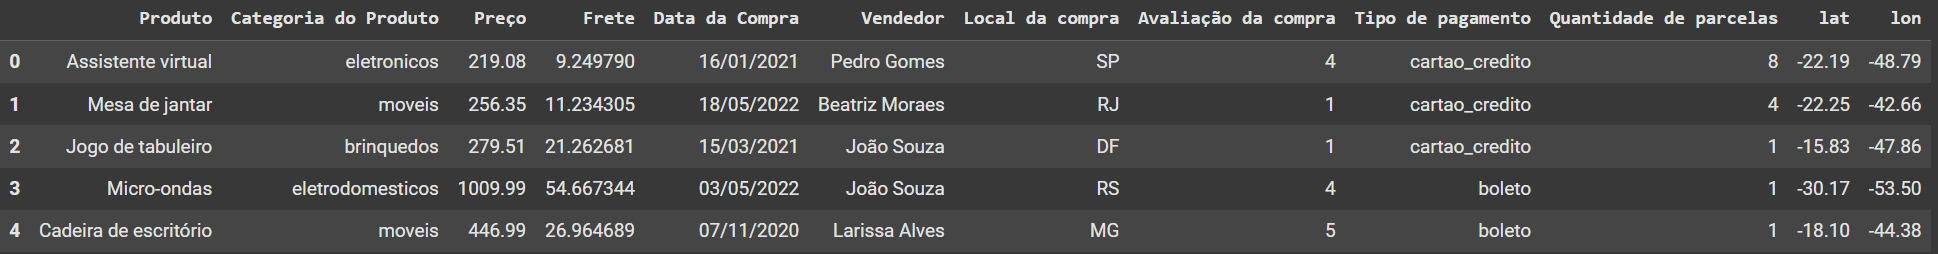



####Os dados acima foram carregados e manipulados com a biblioteca Pandas. A biblioteca Matplotlib foi usada para criar visualizações de dados juntamente com Seaborn. Com essas ferramentas foi possivel analisar métricas como faturamento, avaliações e desempenho de vendas.

## 📊 2. Investigando os Dados
####Para responder a pergunta que tanto tem tirado o sono do Sr. João, analisamos diversos fatores: faturamento, categorias mais vendidas, avaliações dos clientes, produtos mais e menos vendidos e por fim frete médio.
####Inicialmente, foi criado um dataframe unificado com todas as lojas contendo a coluna "Lojas". Dessa forma facilitamos os calculos trabalhando criando dataframes especificos para cada tipo de análise, se necessário. O DataFrame unificado totalizou 9435 linhas e 13 colunas. Cada métrica nos aproxima de uma conclusão precisa. Afinal, a eficiência de uma loja vai muito além do faturamento bruto—envolve satisfação dos clientes, custos operacionais e sustentabilidade do negócio.
###2.1 Análise do faturamento

####O gráfico abaixo "Faturamento Total por Loja" exibe o total de receita gerado por cada unidade da Alura Store, possibilitando uma comparação direta entre elas. A  Loja 1 tem o maior faturamento total: *R$`1,534,509.12`*, indicando forte desempenho financeiro. Já a Loja 4 tem o menor faturamento total:*R$`1,384,497.58`*. A diferença entre as lojas é significativa, embora todas tenham faturamento na casa dos milhões, há um gap de quase **`R$ 150 mil`** entre a Loja 1 e a Loja 4.



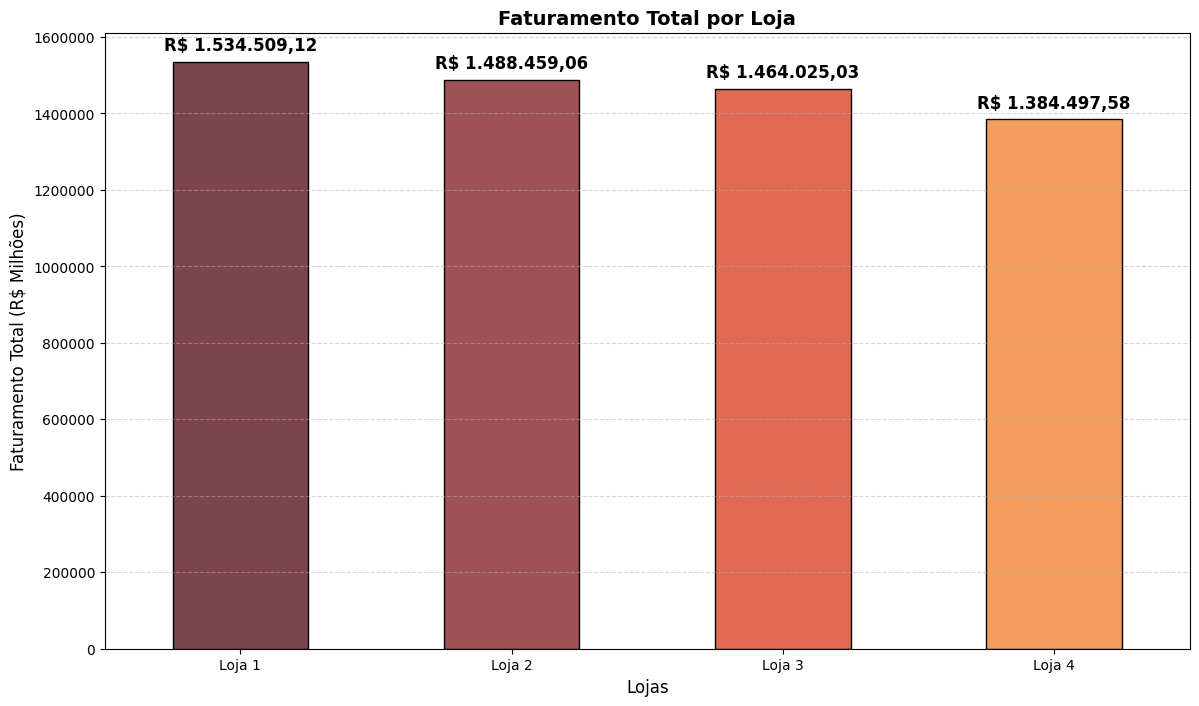

####Combinando a informação acima com  o gráfico “Faturamento Médio por Loja” que mostra a média de receita em Reais, podemos interpretar que a loja 1 também tem maior faturamento médio *`R$ 650,49`*, indicando que, em média, ela vende mais por transação, comparando com a Loja 4 que tem o menor faturamento médio de *`R$ 587,15`*, um indicativo de que pode ter dificuldades em gerar ticket alto por compra. Se queremos identificar a loja menos eficiente, esse gráfico sugere que a Loja 4 pode ser um forte candidata, pois apresenta menor faturamento médio por compra. Mas ainda é um pouco cedo para essa conclusão, não achas?






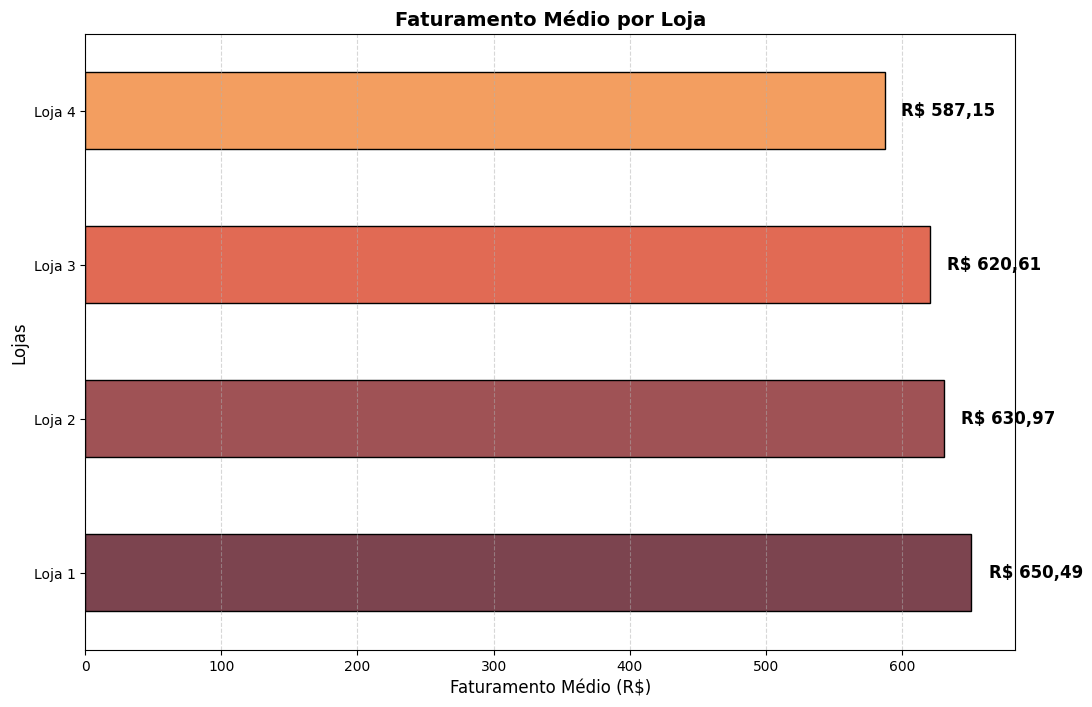

###2.2 Quantidade de produtos vendidos por categoria
#### Continuando a nossa análise foi a hora de conhecer os produtos mais vendidos por categoria. Analisando o gráfico de abaixo podemos destacar o seguinte:
####**Distribuição de vendas por categoria:**
####Móveis e Eletrônicos parecem estar entre as categorias mais vendidas em todas as lojas, essas categorias provavelmente impulsionam o faturamento das lojas, já que itens eletrônicos e móveis tendem a ter um ticket médio mais alto. A loja 4 mantém o padrão não sendo um fator tão expressivo para a sua baixa perfomance.


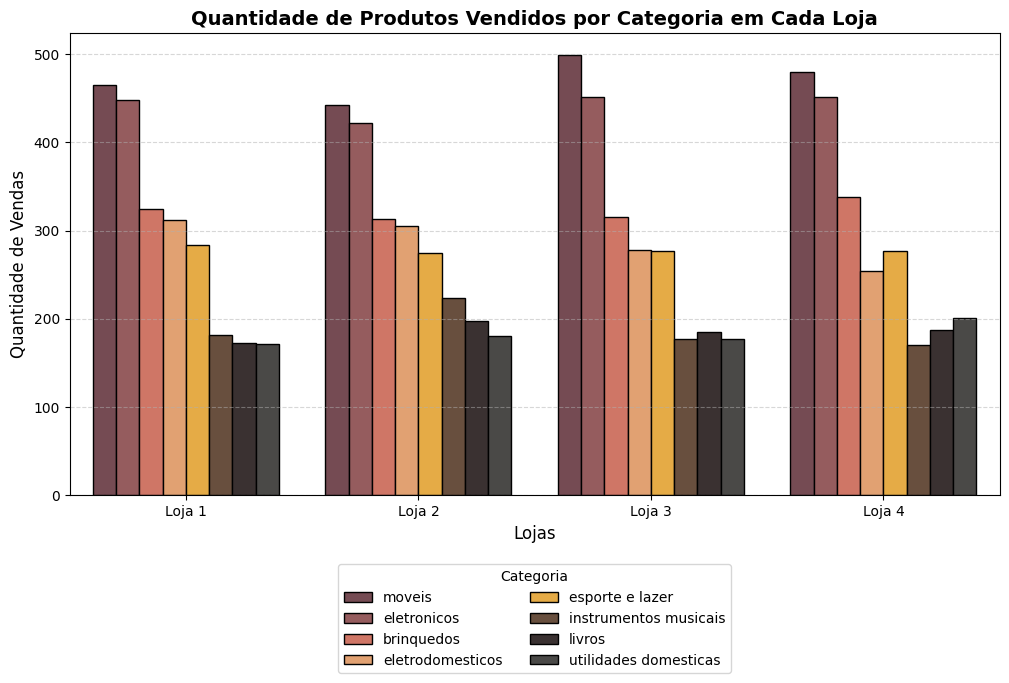

#### Descobrimos ainda que o faturamento com móveis e Eletrônicos corresponde e a mais da metade do total em cada unidade, conforme mostra a tabela abaixo.Nela é possivel verificar que a Loja 4 depende ainda mais dessas categorias (57.98%), pois apesar de ter o menor faturamento total, ela tem o maior percentual vindo de Móveis e Eletrônicos. Isso evidencia uma dependência de Móveis e Eletrônicos tornando a Loja 4 menos resiliente a mudanças no mercado.

#####*Percentual de Faturamento das Categorias Móveis e Eletrônicos por Loja*

| Loja  | Percentual |
|-------|-----------|
| Loja 1 | **53.62%** |
| Loja 2 | **52.61%** |
| Loja 3 | **55.72%** |
| Loja 4 | **57.98%** |




###2.3 Produtos mais e menos vendidos
####Para descobrir os produtos mais e menos vendidos, construimos um gráfico com os top 5 mais e menos vendidos em cada loja, o que nos dá uma visão clara sobre a demanda.
####**Variação entre lojas:**
####Dentre os **produtos mais vendidos**, os Produtos eletrônicos dominam as vendas. Em várias lojas, itens como **Celular ABXY, Headset Gamer e Notebook** aparecem entre os mais vendidos. Isso indica que eletrônicos são uma categoria essencial para a receita total da Alura Store.
####Alguns móveis também se destacam, Produtos como **Mesa de jantar e Guarda-roupas** tiveram alta demanda em algumas unidades.Isso sugere que os clientes buscam não apenas tecnologia, mas também itens para casa.
####**Diferença de perfil entre lojas**  
####Algumas lojas focam mais em eletrônicos, enquanto outras vendem mais móveis.
####Vemos também que cada loja tem um conjunto diferente de produtos menos vendidos, o que sugere que a demanda muda conforme o público e a localização. Exemplo: Na Loja 4, produtos de maior valor como Lavadora de roupas e Geladeira aparecem entre os menos vendidos, o que pode indicar que essa unidade tem menor procura por eletrodomésticos.
####Dentre as categorias menos vendidas os Instrumentos musicais (Guitarra, Violão, Pandeiro) aparecem em diversas lojas como pouco vendidos, Móveis (Guarda-roupas e Mesa de Jantar) também aparecem entre os menos vendidos em algumas lojas. Também vemos que os itens de cozinha (Jogo de panelas, Panela de pressão) têm baixa saída em algumas unidades.




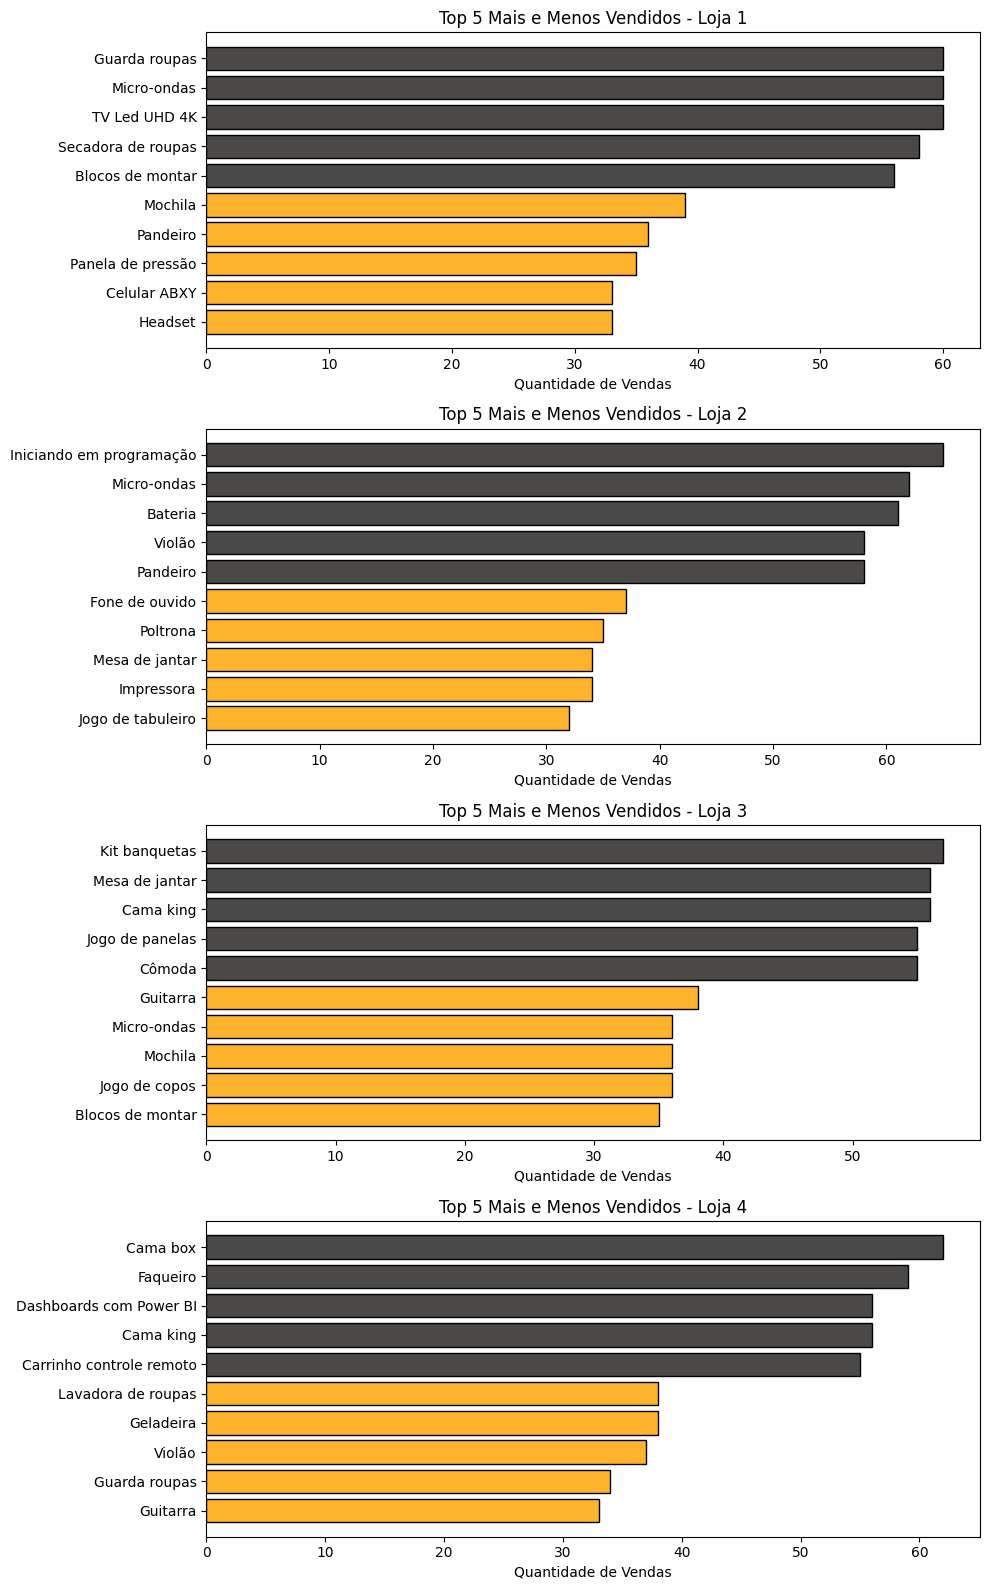

###2.4 Média de Avaliação das Lojas
####A média das avaliações dos clientes para cada loja teve como objetivo entender a satisfação dos clientes com os produtos vendidos.
#### **Principais descobertas**
####A Loja 3 tem a melhor média de avaliações, com **4.048** indicando que seus clientes estão mais satisfeitos. Isso pode sugerir que o atendimento, a variedade de produtos ou a experiência de compra são superiores em relação às demais.
####Enquanto que a Loja 1 tem a menor avaliação **3.977**, comparada às outras lojas, o que pode significar que os clientes tiveram **mais problemas** nessa unidade, como qualidade do atendimento, disponibilidade de produtos ou processos de compra.
#### No entanto, a Loja 4 tem um desempenho intermediário com **3.996**, não é a pior, mas também não está entre as melhores.
####A variação entre as lojas não é tão grande, mas mesmo pequenas diferenças podem indicar **tendências importantes** sobre a experiência dos clientes.



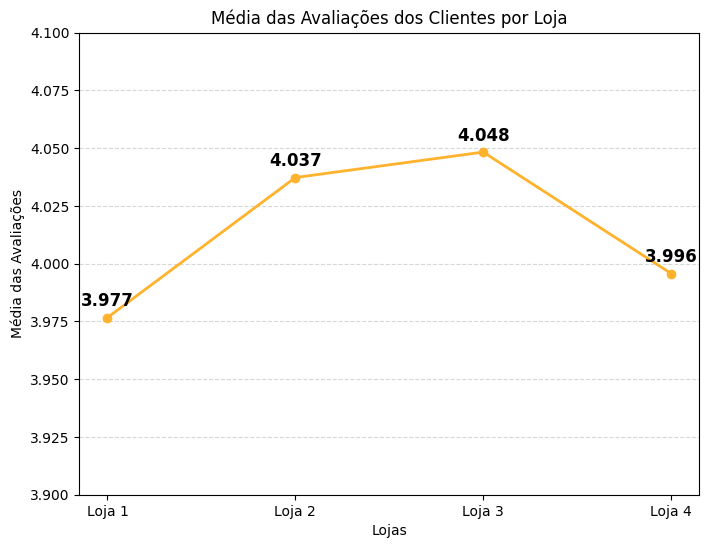

###2.5 Custo médio frete
#### O custo médio de frete para cada loja nos mostra quanto, em média, está sendo gasto com frete para cada uma das lojas. Também nos dá insights importantes sobre a logística e eficiência de cada loja.
####Loja 1 tem o maior custo médio de frete (`R$ 34.69`): Isso pode indicar que essa unidade está enviando pedidos para regiões mais distantes ou que há menor eficiência na negociação de tarifas com transportadoras. Outra possibilidade é que os pedidos dessa loja tenham características que tornam o frete mais caro (mais pesados ou volumosos).
####Loja 4 tem o menor custo médio de frete (`R$ 31.28`) Essa unidade pode estar localizada estrategicamente em uma região com menores custos logísticos.Pode também ser a loja que mais otimiza envios, agrupando produtos para reduzir custos por pedido.
####Pequena variação entre lojas, mas impacto no custo operacional A diferença entre a loja mais cara e a mais barata é R$ 3.41. Embora pareça pequena por pedido, ao longo de centenas/milhares de envios, essa diferença pode representar um impacto significativo nos custos totais da empresa.
####Calculamos o percentual do frete em relação ao faturamento total de cada loja para entender melhor o impacto desse custo nas finanças e confirmamos que  o frete não é um custo problemático, representando 0,002% para lojas.



| Lojas   | Custo_Médio_Frete:   |
|:--------|:---------------------|
| Loja 1  | `R$ 34.69`             |
| Loja 2  | `R$ 33.62`            |
| Loja 3  | `R$ 33.07`              |
| Loja 4  | `R$ 31.28`             |

##💡 5. Conclusão: Qual loja vender?
####Após uma análise detalhada de faturamento, avaliação dos clientes, desempenho de produtos e custos operacionais, fica evidente que a Loja 4 apresenta menor eficiência em relação às demais unidades da Alura Store.
####**Principais fatores que justificam essa decisão:**
####1. Menor faturamento total: A Loja 4 gera `R$ 1.384.497,58`, ficando significativamente atrás da Loja 1 (`R$ 1.534.509,12`).
####2. Menor faturamento médio por venda: O ticket médio de compra é `R$ 587,15`, o menor entre todas as lojas, indicando menor capacidade de gerar vendas de alto valor.
####3. Alta dependência de poucas categorias: 57.98% do faturamento da Loja 4 vem de Móveis e Eletrônicos, tornando-a menos resiliente a mudanças no mercado.
####4. Baixa demanda por produtos de maior valor: Eletrodomésticos como Geladeira e Lavadora de roupas aparecem entre os menos vendidos, sinalizando dificuldades em escoar itens mais caros.
####5. Avaliação dos clientes intermediária: A Loja 4 possui nota 3.996, não sendo a pior, mas também não destacando-se como referência em satisfação.
####6. Frete não influencia na decisão: Apesar da Loja 4 ter o menor custo médio de frete (`R$ 31.28`), o impacto financeiro é irrelevante (0.002% do faturamento).
####Com base nesses fatores, recomenda-se que o Sr. João venda a Loja 4, pois ela apresenta menor eficiência geral quando comparada as demais lojas.


### 📂Dados extras: Impacto financeiro da venda da Loja 4
####Se a Loja 4 for vendida, a empresa deixará de faturar R$ 1.384.497,58, ou seja, aproximadamente 23.6% do faturamento total da rede. No entanto, essa perda pode ser compensada ao reforçar estratégias nas demais lojas, focando em produtos com alta demanda e ampliando a eficiência operacional.



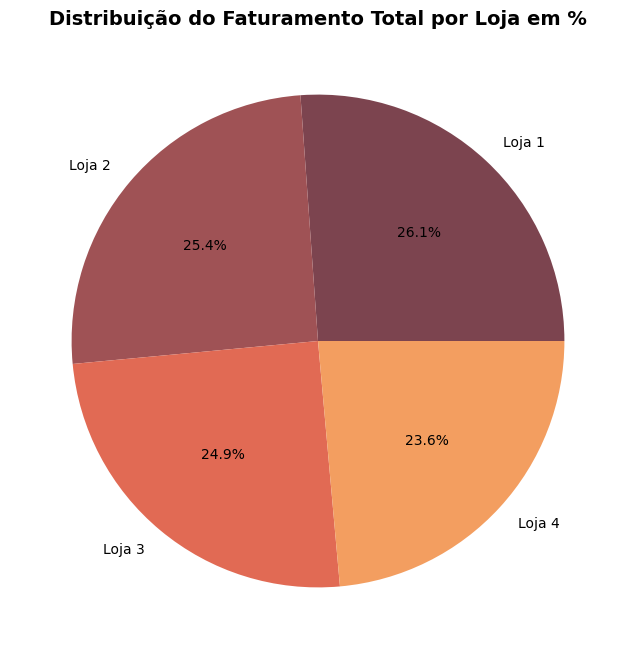

### 📊 Comparação entre Lojas

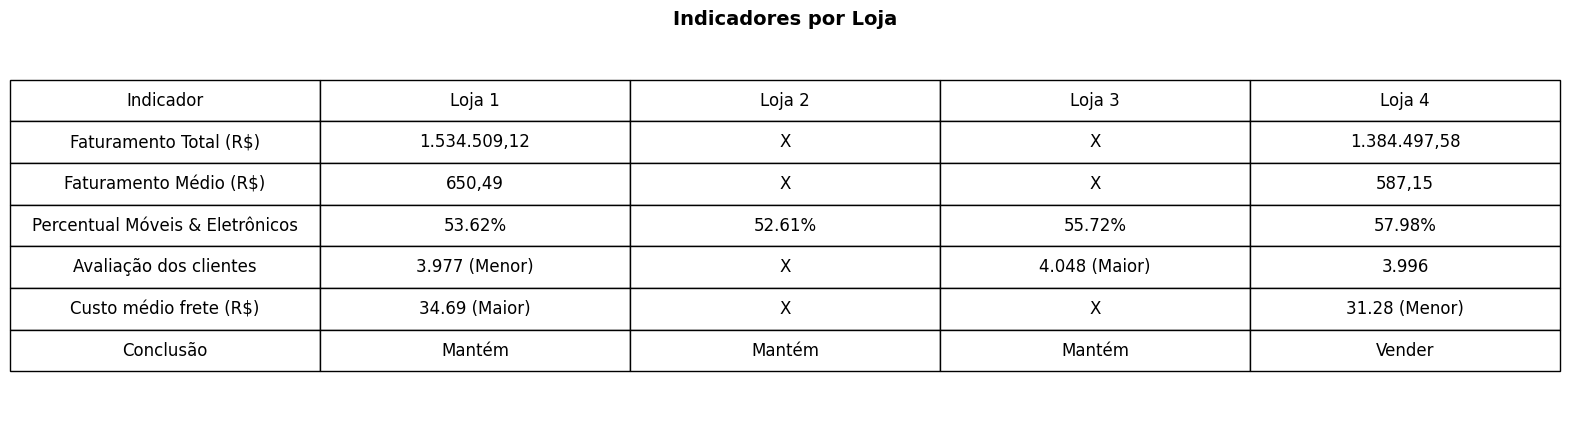

#####Tabela final comparativa, para reforçar a conclusão e facilitar a interpretação dos dados!!!